## KMeans Image Segmentation

This code reads an image and treats pixel as three element feature vector of unsupervised data. It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [1]:
# The usual loading of modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
from sklearn import cluster
from scipy import misc
from numpy import zeros
import numpy as np
import random

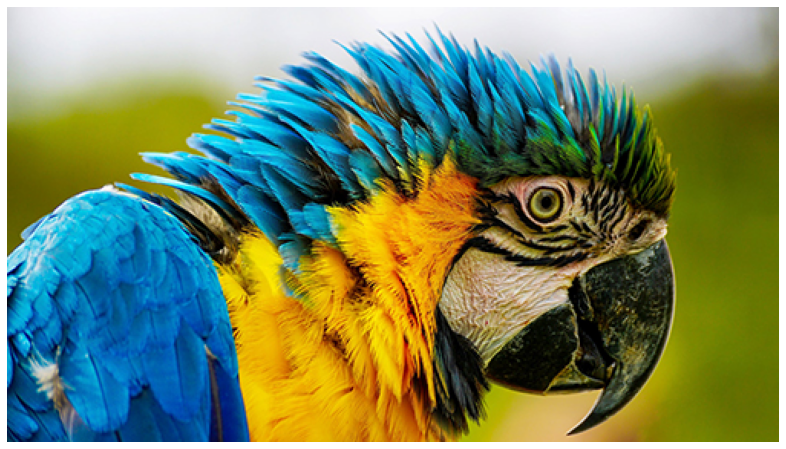

In [2]:
# Load an image.
imagex = image.imread("parrot_small.jpg") # You may want to test with a smaller image, it will be faster
plt.figure(figsize = (15,8))
plt.axis("off") # An axis free plot
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image. 

In [3]:
def stabilized(prev,c):
    LIMIT = 2
    for i in range(len(c)):
        for j in range(3):
            if abs(c[i][j] - prev[i][j]) > LIMIT:
                return False
    return True
    

# THIS IS THE PART YOU ARE TO REPLACE
cluster_count = 5 # How many clusters we want
#img = plt.imread(image_2d)
r,g,b = image_2d.T
print("r",r)
print("g",g)
print("b",b)

#choosing initial centroids 
c = []
buckets = []
cluster_labels = []
for i in range(cluster_count):
    c.append([random.randint(0,255) for _ in range(3)])
    buckets.append([])
print(c)

#stabilize centroids
prev = c.copy()
count = 0
while True:
    for bu in buckets: 
        bu.clear()
    cluster_labels.clear()   
    count += 1
    for i in range(len(r)):
        curr = 0
        curr_dist = 255*3 
        for k in range(len(c)):
                #print("RGB Values : ",r[i],g[i],b[i])
                #print("Centroid Values : ",c[k][0],c[k][1],c[k][2])
                r_dist = abs(r[i] - c[k][0])
                g_dist = abs(g[i] - c[k][1])
                b_dist = abs(b[i] - c[k][2])
                new_dist = r_dist+g_dist+b_dist
                #print("curr_dist : ",curr_dist)
                #print("new_dist : ",new_dist)
                if new_dist < curr_dist:
                    curr_dist = new_dist
                    curr = k
        buckets[curr].append(list((r[i],g[i],b[i])))
        cluster_labels.append(curr)
        #print("Assigned to Bucket ",curr)
    for i in range(len(c)):      
        m = np.median(buckets[i],axis=0)
        print("median of bucket",i,":",m)
        c[i] = m
    print("\n")
    
    if stabilized(prev,c):
        print("Centroids Stabilized. Iterations :",count)
        print("Cluster Labels Count :",len(cluster_labels))
        break
    else:
        prev = c.copy()
                
            
            
'''
kmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer
kmeans_cluster.fit(image_2d) # Apply it to the data
cluster_centers = kmeans_cluster.cluster_centers_ # we're not using these
cluster_labels = kmeans_cluster.labels_ # Cluster membership for each pixel
'''

r [216 217 219 ... 106 108 104]
g [217 218 220 ... 117 117 117]
b [221 223 225 ...   0   0   0]
[[114, 248, 140], [130, 143, 191], [80, 175, 106], [183, 17, 177], [164, 76, 105]]
median of bucket 0 : [236. 236. 241.]
median of bucket 1 : [ 15. 168. 197.]
median of bucket 2 : [111. 128.   3.]
median of bucket 3 : [  1.  38. 151.]
median of bucket 4 : [87. 77. 12.]


median of bucket 0 : [222. 224. 229.]
median of bucket 1 : [  6. 154. 197.]
median of bucket 2 : [159. 139.   3.]
median of bucket 3 : [  2.  81. 135.]
median of bucket 4 : [50. 51.  8.]


median of bucket 0 : [222. 223. 229.]
median of bucket 1 : [  5. 152. 200.]
median of bucket 2 : [160. 139.   4.]
median of bucket 3 : [  2.  86. 138.]
median of bucket 4 : [41. 44.  8.]


median of bucket 0 : [222. 223. 229.]
median of bucket 1 : [  5. 153. 201.]
median of bucket 2 : [158. 137.   3.]
median of bucket 3 : [  2.  88. 140.]
median of bucket 4 : [36. 40.  9.]


median of bucket 0 : [221. 223. 228.]
median of bucket 1 : [  5. 

"\nkmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer\nkmeans_cluster.fit(image_2d) # Apply it to the data\ncluster_centers = kmeans_cluster.cluster_centers_ # we're not using these\ncluster_labels = kmeans_cluster.labels_ # Cluster membership for each pixel\n"

In [4]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

[221. 223. 228.   0.]
[  5. 157. 203.   1.]
[154. 133.   3.   2.]
[  2.  90. 145.   3.]
[28. 33. 12.  4.]


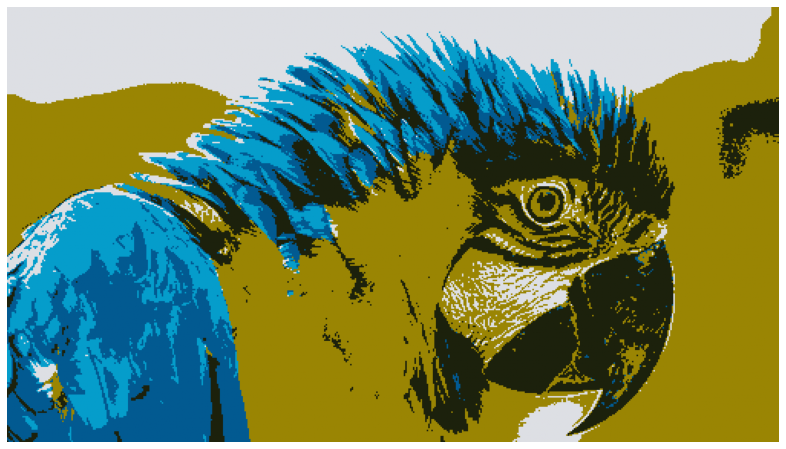

In [5]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)

# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')